In [99]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [100]:
os.path.abspath(os.curdir)

'/mnt/c/Users/crulis/Documents/projects/yolo_tdid_github'

In [101]:
result_dir = Path('results_wc')
files = list(result_dir.glob('*.csv'))

In [102]:
files

[PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n-19_k-10_bias-False_augment-True_use_wc-True_seed-995826.csv'),
 PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n-19_k-1_bias-False_augment-True_use_wc-True_seed-378396.csv'),
 PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n-19_k-3_bias-False_augment-True_use_wc-True_seed-307978.csv'),
 PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n-19_k-5_bias-False_augment-True_use_wc-True_seed-693691.csv'),
 PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n-2_k-10_bias-False_augment-True_use_wc-True_seed-456197.csv'),
 PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n-2_k-1_bias-False_augment-True_use_wc-True_seed-975904.csv'),
 PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n-2_k-3_bias-False_augment-True_use_wc-True_seed-710914.csv'),
 PosixPath('results_wc/yolow-l_sighted-True_clutter-False_hand-False_n

append model size column

In [103]:
files[0].stem

'yolow-l_sighted-True_clutter-False_hand-False_n-19_k-10_bias-False_augment-True_use_wc-True_seed-995826'

In [104]:
name_re = re.compile(r'yolow-(.)_sighted-(.+)_clutter-(.+)_hand-(.+)_n-(\d+)_k-(\d+)_bias-.+_augment-(.+)_use_wc-(.+)_seed-(\d+).*')

dfs = []

for f in files:
    m = name_re.match(f.stem)
    if m is None:
        print(f"Skipping {f}")
        continue
    df = pd.read_csv(f)
    df['size'] = m.group(1)
    df['train blind'] = m.group(2) == "False"
    df['train clutter'] = m.group(3) == "True"
    df['train hand'] = m.group(4) == "True"
    df['n_objects'] = int(m.group(5))
    df['k_examples'] = int(m.group(6))
    df['augment'] = m.group(7) == "True"
    df['WC'] = m.group(8) == "True"
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

KeyboardInterrupt: 

In [ ]:
dfs[0].columns

Index(['repeat', 'seed', 'hand', 'blind', 'illuminated', 'torch',
       'volume_portrait', 'clutter', 'target_class', 'predicted_class',
       'predicted_prob', 'correct', 'prob_cls_0', 'prob_cls_1', 'prob_cls_2',
       'prob_cls_3', 'prob_cls_4', 'prob_cls_5', 'prob_cls_6', 'prob_cls_7',
       'prob_cls_8', 'prob_cls_9', 'prob_cls_10', 'prob_cls_11', 'prob_cls_12',
       'prob_cls_13', 'prob_cls_14', 'prob_cls_15', 'prob_cls_16',
       'prob_cls_17', 'prob_cls_18', 'size', 'train blind', 'train clutter',
       'train hand', 'n_objects', 'k_examples', 'augment', 'WC'],
      dtype='object')

In [ ]:
df.columns

Index(['repeat', 'seed', 'hand', 'blind', 'illuminated', 'torch',
       'volume_portrait', 'clutter', 'target_class', 'predicted_class',
       'predicted_prob', 'correct', 'prob_cls_0', 'prob_cls_1', 'prob_cls_2',
       'prob_cls_3', 'prob_cls_4', 'prob_cls_5', 'prob_cls_6', 'prob_cls_7',
       'prob_cls_8', 'prob_cls_9', 'prob_cls_10', 'prob_cls_11', 'prob_cls_12',
       'prob_cls_13', 'prob_cls_14', 'prob_cls_15', 'prob_cls_16',
       'prob_cls_17', 'prob_cls_18', 'size', 'train blind', 'train clutter',
       'train hand', 'n_objects', 'k_examples', 'augment', 'WC'],
      dtype='object')

In [ ]:
df = df[df["train hand"] == False] # only keep training images with no hand

In [ ]:
any(df["train hand"])

False

In [ ]:
cls_mapping = ['airborne gum', 'aspirin', 'baked cheetos', 'baked lays chips', 'cheerios cereal', 'chicken soup can', 'diet coke bottle', 'dr pepper can', 'extra dry skin moisturizer', 'great grains cereal', 'grill salt', 'hand sanitizer', 'hand soap', 'mandarin can', 'mountain dew can', 'oregano', 'regular coke bottle', 'spf55 sunscreen', 'sprite bottle']

In [ ]:
df["target class name"] = df["target_class"].apply(lambda x: cls_mapping[x])

In [ ]:
df_a = df[df["augment"]]    # with augmentations
df_b = df[~df["augment"]]   # without augmentations (base)

In [ ]:
# number of sample per object class
df_a.groupby("target class name").size()

target class name
airborne gum                  119340
aspirin                       114480
baked cheetos                 117720
baked lays chips              115200
cheerios cereal               115560
chicken soup can              115920
diet coke bottle              121140
dr pepper can                 116100
extra dry skin moisturizer    112320
great grains cereal           116640
grill salt                    114480
hand sanitizer                114300
hand soap                     115200
mandarin can                  117000
mountain dew can              115560
oregano                       116640
regular coke bottle           116280
spf55 sunscreen               116100
sprite bottle                 113220
dtype: int64

In [ ]:
prob_cols = [f"prob_cls_{i}" for i in range(19)]

# General accuracy

In [ ]:
df_b["correct"].mean()

nan

In [ ]:
df_a["correct"].mean()

0.30985157952069714

In [ ]:
df_a[(df_a["blind"] == False) & (df_a["train blind"] == False) & (df_a["clutter"] == False) & (df_a["k_examples"] == 10)]["correct"].mean()

0.3651579520697168

In [ ]:
df_a[(df_a["blind"] == False) & (df_a["train blind"] == False)]["correct"].mean()

0.31774986383442266

In [ ]:
df_a[(df_a["blind"] == False) & (df_a["train blind"] == False) & (df_a["clutter"] == False)]["correct"].mean()

0.3507148692810457

# Breakdown by model

In [ ]:
df.groupby(['size', 'n_objects', 'k_examples'])['correct'].mean()

size  n_objects  k_examples
l     2          1             0.727778
                 3             0.835833
                 5             0.826759
                 10            0.812500
      4          1             0.541944
                 3             0.612870
                 5             0.575556
                 10            0.604722
      9          1             0.351420
                 3             0.381070
                 5             0.386358
                 10            0.394897
      19         1             0.218489
                 3             0.229055
                 5             0.241706
                 10            0.236910
m     2          1             0.745093
                 3             0.810648
                 5             0.774352
                 10            0.747037
      4          1             0.493565
                 3             0.558935
                 5             0.565694
                 10            0.538241
      9     

In [ ]:
df1 = df[df["train blind"] == False]

In [ ]:
out1 = df1.groupby(['size', 'n_objects', 'k_examples', 'augment', 'seed'])["correct"].mean()\
    .groupby(['size', 'n_objects', 'k_examples', 'augment']).agg(('mean', 'std'))

In [ ]:
# put model sizes and augment in columns
# descend mean and row columns to the lower level
# out1.unstack(level=[3, 0])
pivoted = out1.pivot_table(values=["mean", "std"], index=['n_objects', 'k_examples'], columns=["augment", "size"])
pivoted = pivoted.reorder_levels([1, 2, 0], axis=1)
pivoted = pivoted.sort_index(axis=1, level=[2], sort_remaining=False, ascending=False)\
    .sort_index(axis=1, level=[1], ascending=False, sort_remaining=False)\
    .sort_index(axis=1, level=[0], sort_remaining=False)
pivoted

augment                   True                                          \
size                         s                   m                   l   
                          mean       std      mean       std      mean   
n_objects k_examples                                                     
2         1           0.711481  0.171187  0.745093  0.159177  0.727778   
          3           0.687685  0.167561  0.810648  0.124637  0.835833   
          5           0.703056  0.167621  0.774352  0.149203  0.826759   
          10          0.748981  0.158174  0.747037  0.141014  0.812500   
4         1           0.487593  0.120454  0.493565  0.130476  0.541944   
          3           0.501481  0.110699  0.558935  0.120928  0.612870   
          5           0.450509  0.107326  0.565694  0.104516  0.575556   
          10          0.495556  0.109911  0.538241  0.126796  0.604722   
9         1           0.267346  0.061629  0.328951  0.064923  0.351420   
          3           0.294938  0.062912  0.360041  0.069286  0.381070   
          5           0.282613  0.056690  0.348436  0.058850  0.386358   
          10          0.295288  0.060276  0.393333  0.056412  0.394897   
19        1           0.149454  0.029119  0.181374  0.030014  0.218489   
          3           0.159522  0.025241  0.211033  0.025527  0.229055   
          5           0.160439  0.018983  0.223762  0.020403  0.241706   
          10          0.168294  0.015083  0.224600  0.015485  0.236910   

augment                         
size                            
                           std  
n_objects k_examples            
2         1           0.128757  
          3           0.127432  
          5           0.116316  
          10          0.115594  
4         1           0.101232  
          3           0.118144  
          5           0.137073  
          10          0.106607  
9         1           0.079715  
          3           0.045107  
          5           0.057712  
          10          0.049863  
19        1           0.033933  
          3           0.023112  
          5           0.017062  
          10          0.010719

In [ ]:
print(pivoted.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & augment & \multicolumn{6}{r}{True} \\
 & size & \multicolumn{2}{r}{s} & \multicolumn{2}{r}{m} & \multicolumn{2}{r}{l} \\
 &  & mean & std & mean & std & mean & std \\
n_objects & k_examples &  &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{2} & 1 & 0.711481 & 0.171187 & 0.745093 & 0.159177 & 0.727778 & 0.128757 \\
 & 3 & 0.687685 & 0.167561 & 0.810648 & 0.124637 & 0.835833 & 0.127432 \\
 & 5 & 0.703056 & 0.167621 & 0.774352 & 0.149203 & 0.826759 & 0.116316 \\
 & 10 & 0.748981 & 0.158174 & 0.747037 & 0.141014 & 0.812500 & 0.115594 \\
\cline{1-8}
\multirow[t]{4}{*}{4} & 1 & 0.487593 & 0.120454 & 0.493565 & 0.130476 & 0.541944 & 0.101232 \\
 & 3 & 0.501481 & 0.110699 & 0.558935 & 0.120928 & 0.612870 & 0.118144 \\
 & 5 & 0.450509 & 0.107326 & 0.565694 & 0.104516 & 0.575556 & 0.137073 \\
 & 10 & 0.495556 & 0.109911 & 0.538241 & 0.126796 & 0.604722 & 0.106607 \\
\cline{1-8}
\multirow[t]{4}{*}{9} & 1 & 0.267346 & 0.061629 & 0.328951 & 0.064923 & 0.351420 &

In [ ]:
# put model sizes and augment in columns
# descend mean and row columns to the lower level
# out1.unstack(level=[3, 0])
# pivoted.insert(0, "value", pivoted["mean"].astype(str) + " " + pivoted["std"].astype(str))
pivoted = out1.apply(lambda x: f"{x['mean']*100:.2f}\\% ({x['std']*100:.2f})", axis=1).unstack(level=[3, 0])
# pivoted = pivoted.reorder_levels([1, 2], axis=1)
pivoted = pivoted.sort_index(axis=1, level=[1], ascending=False, sort_remaining=False)\
    .sort_index(axis=1, level=[0], sort_remaining=False)
pivoted

augment                          True                                  
size                                s                m                l
n_objects k_examples                                                   
2         1           71.15\% (17.12)  74.51\% (15.92)  72.78\% (12.88)
          3           68.77\% (16.76)  81.06\% (12.46)  83.58\% (12.74)
          5           70.31\% (16.76)  77.44\% (14.92)  82.68\% (11.63)
          10          74.90\% (15.82)  74.70\% (14.10)  81.25\% (11.56)
4         1           48.76\% (12.05)  49.36\% (13.05)  54.19\% (10.12)
          3           50.15\% (11.07)  55.89\% (12.09)  61.29\% (11.81)
          5           45.05\% (10.73)  56.57\% (10.45)  57.56\% (13.71)
          10          49.56\% (10.99)  53.82\% (12.68)  60.47\% (10.66)
9         1            26.73\% (6.16)   32.90\% (6.49)   35.14\% (7.97)
          3            29.49\% (6.29)   36.00\% (6.93)   38.11\% (4.51)
          5            28.26\% (5.67)   34.84\% (5.89)   38.64\% (5.77)
          10           29.53\% (6.03)   39.33\% (5.64)   39.49\% (4.99)
19        1            14.95\% (2.91)   18.14\% (3.00)   21.85\% (3.39)
          3            15.95\% (2.52)   21.10\% (2.55)   22.91\% (2.31)
          5            16.04\% (1.90)   22.38\% (2.04)   24.17\% (1.71)
          10           16.83\% (1.51)   22.46\% (1.55)   23.69\% (1.07)

In [ ]:
print(pivoted.to_latex())

\begin{tabular}{lllll}
\toprule
 & augment & \multicolumn{3}{r}{True} \\
 & size & s & m & l \\
n_objects & k_examples &  &  &  \\
\midrule
\multirow[t]{4}{*}{2} & 1 & 71.15\% (17.12) & 74.51\% (15.92) & 72.78\% (12.88) \\
 & 3 & 68.77\% (16.76) & 81.06\% (12.46) & 83.58\% (12.74) \\
 & 5 & 70.31\% (16.76) & 77.44\% (14.92) & 82.68\% (11.63) \\
 & 10 & 74.90\% (15.82) & 74.70\% (14.10) & 81.25\% (11.56) \\
\cline{1-5}
\multirow[t]{4}{*}{4} & 1 & 48.76\% (12.05) & 49.36\% (13.05) & 54.19\% (10.12) \\
 & 3 & 50.15\% (11.07) & 55.89\% (12.09) & 61.29\% (11.81) \\
 & 5 & 45.05\% (10.73) & 56.57\% (10.45) & 57.56\% (13.71) \\
 & 10 & 49.56\% (10.99) & 53.82\% (12.68) & 60.47\% (10.66) \\
\cline{1-5}
\multirow[t]{4}{*}{9} & 1 & 26.73\% (6.16) & 32.90\% (6.49) & 35.14\% (7.97) \\
 & 3 & 29.49\% (6.29) & 36.00\% (6.93) & 38.11\% (4.51) \\
 & 5 & 28.26\% (5.67) & 34.84\% (5.89) & 38.64\% (5.77) \\
 & 10 & 29.53\% (6.03) & 39.33\% (5.64) & 39.49\% (4.99) \\
\cline{1-5}
\multirow[t]{4}{*}{19} & 1

<Axes: xlabel='size,n_objects'>

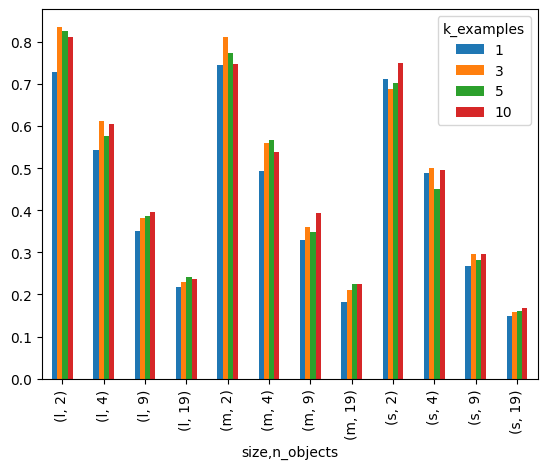

In [ ]:
# make a graph of the breakdown
fig, ax = plt.subplots()
df_a.groupby(['size', 'n_objects', 'k_examples'])['correct'].mean().unstack().plot(kind='bar', ax=ax)

<Axes: xlabel='size,n_objects'>

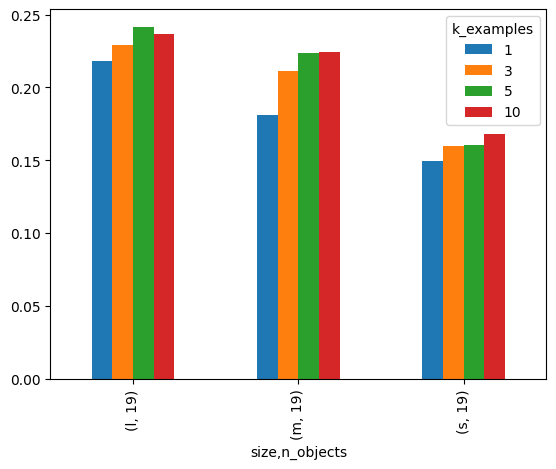

In [ ]:
# make a graph of the breakdown
fig, ax = plt.subplots()
df_a[df_a["n_objects"] == 19].groupby(['size', 'n_objects', 'k_examples'])['correct'].mean().unstack().plot(kind='bar', ax=ax)

In [ ]:
df.columns

Index(['repeat', 'seed', 'hand', 'blind', 'illuminated', 'torch',
       'volume_portrait', 'clutter', 'target_class', 'predicted_class',
       'predicted_prob', 'correct', 'prob_cls_0', 'prob_cls_1', 'prob_cls_2',
       'prob_cls_3', 'prob_cls_4', 'prob_cls_5', 'prob_cls_6', 'prob_cls_7',
       'prob_cls_8', 'prob_cls_9', 'prob_cls_10', 'prob_cls_11', 'prob_cls_12',
       'prob_cls_13', 'prob_cls_14', 'prob_cls_15', 'prob_cls_16',
       'prob_cls_17', 'prob_cls_18', 'size', 'train blind', 'train clutter',
       'train hand', 'n_objects', 'k_examples', 'augment', 'WC',
       'target class name'],
      dtype='object')

<Axes: xlabel='target class name'>

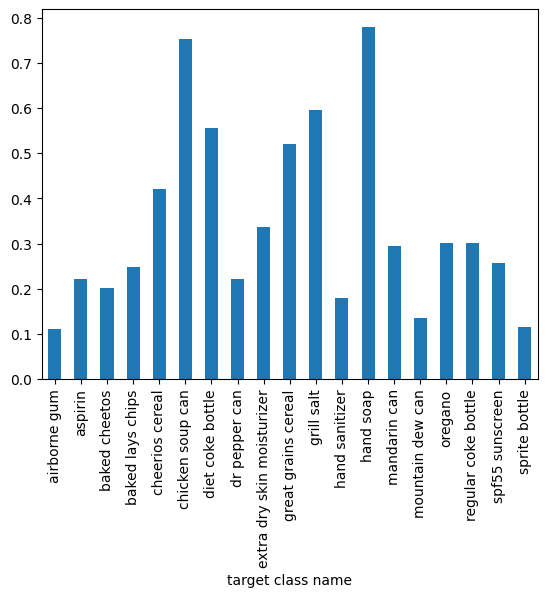

In [ ]:
# make a graph of the accuracy by target_class for the model size l
fig, ax = plt.subplots()
df_a[df_a['size'] == 'l'].groupby(['target class name'])['correct'].mean().plot(kind='bar', ax=ax)

<Axes: xlabel='train blind'>

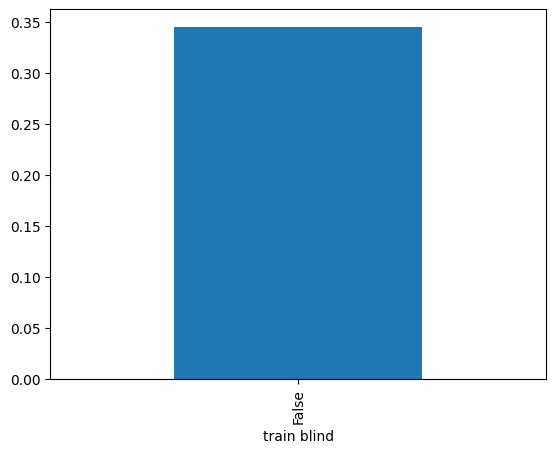

In [ ]:
# make a graph of the accuracy according to the blind attribute for the model l
fig, ax = plt.subplots()
df_a[df_a['size'] == 'l'].groupby(['train blind'])['correct'].mean().plot(kind='bar', ax=ax)

<Axes: title={'center': 'correct'}, xlabel='train blind'>

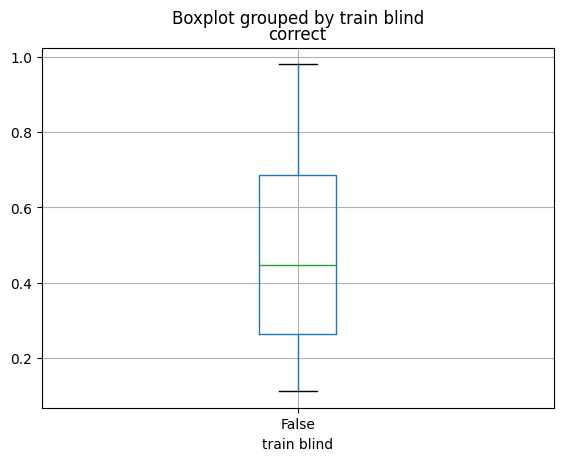

In [ ]:
grouped_df = df_a[df_a['size'] == 'l'].groupby(['train blind', "seed"])['correct'].mean().reset_index()

fig, ax = plt.subplots()
grouped_df.boxplot(column='correct', by='train blind', ax=ax)

<Axes: xlabel='illuminated'>

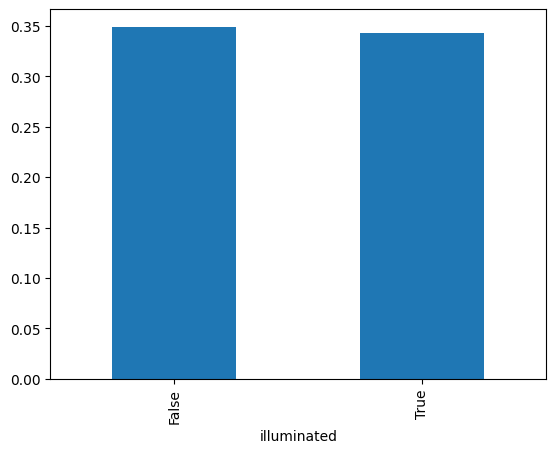

In [ ]:
# make graph according to illumination still for the model l
fig, ax = plt.subplots()
df_a[df_a['size'] == 'l'].groupby(['illuminated'])['correct'].mean().plot(kind='bar', ax=ax)

<Axes: xlabel='train hand'>

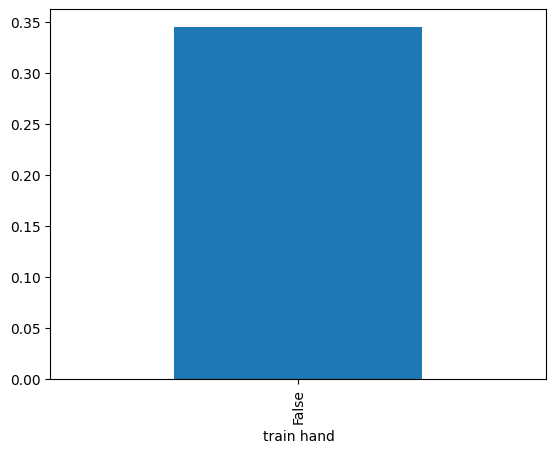

In [ ]:
# make the same graph with hand or no hand, still for model l
fig, ax = plt.subplots()
df_a[df_a['size'] == 'l'].groupby(['train hand'])['correct'].mean().plot(kind='bar', ax=ax)

In [ ]:
df[df["n_objects"] == 9].groupby(["seed"])["correct"].mean()

seed
110902    0.312963
110903    0.336420
110904    0.364198
110905    0.441358
110906    0.460494
            ...   
949937    0.366049
949938    0.297531
949939    0.310494
949940    0.254321
949941    0.311728
Name: correct, Length: 360, dtype: float64

# Top-k accuracies

In [ ]:
from sklearn.metrics import top_k_accuracy_score

In [ ]:
def measure_topk(df, k=5):
    return top_k_accuracy_score(df["target_class"], df[prob_cols], k=k)

In [ ]:
measure_topk(df_a[(df_a["n_objects"] == 19) & (df_a["size"] == "l") & (df_a["k_examples"] == 10)], k=3)

0.5230116959064327

In [ ]:
((df_a[(df_a["n_objects"] == 19) & (df_a["size"] == "l") & (df_a["k_examples"] == 10)][prob_cols] > 0.9).sum(axis=1) > 1).mean()

0.704980506822612

In [ ]:
((df_a[(df_a["n_objects"] == 19) & (df_a["size"] == "l") & (df_a["k_examples"] == 10)][prob_cols]/19).sum(axis=1) > 0.5).mean()

0.423635477582846

In [ ]:
# compute the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def compute_confusion(df):
    cm = confusion_matrix(df["target_class"],
                        df[prob_cols].idxmax(axis=1).apply(lambda x: int(x.split("_")[-1])),
                        normalize=None)
    return cm

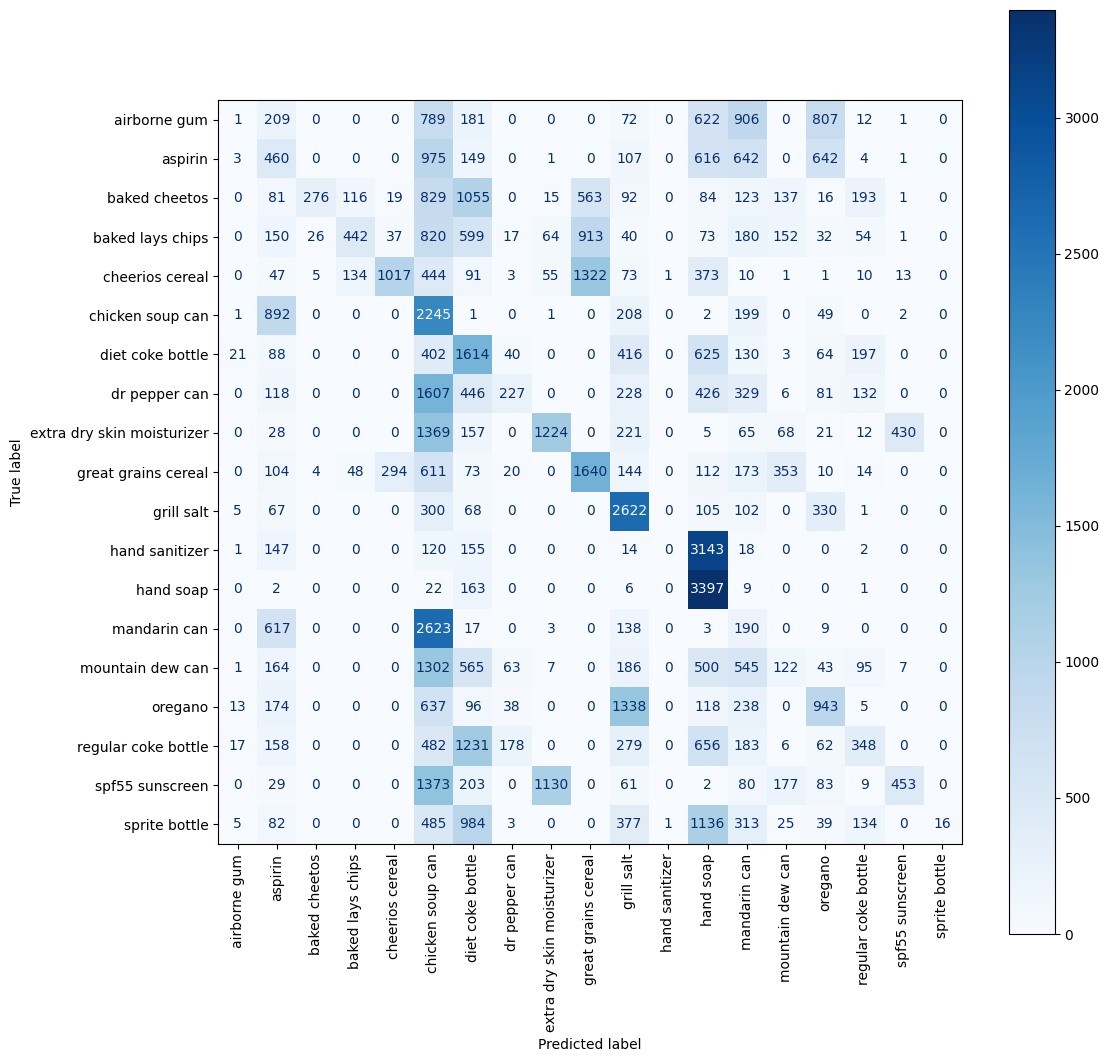

In [ ]:
cm = compute_confusion(df_a[(df_a["n_objects"] == 19) & (df_a["size"] == "l") & (df_a["k_examples"] == 5) & (df_a["blind"] == False)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls_mapping)

# make the plot larger
fig, ax = plt.subplots(figsize=(12, 12))

disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)

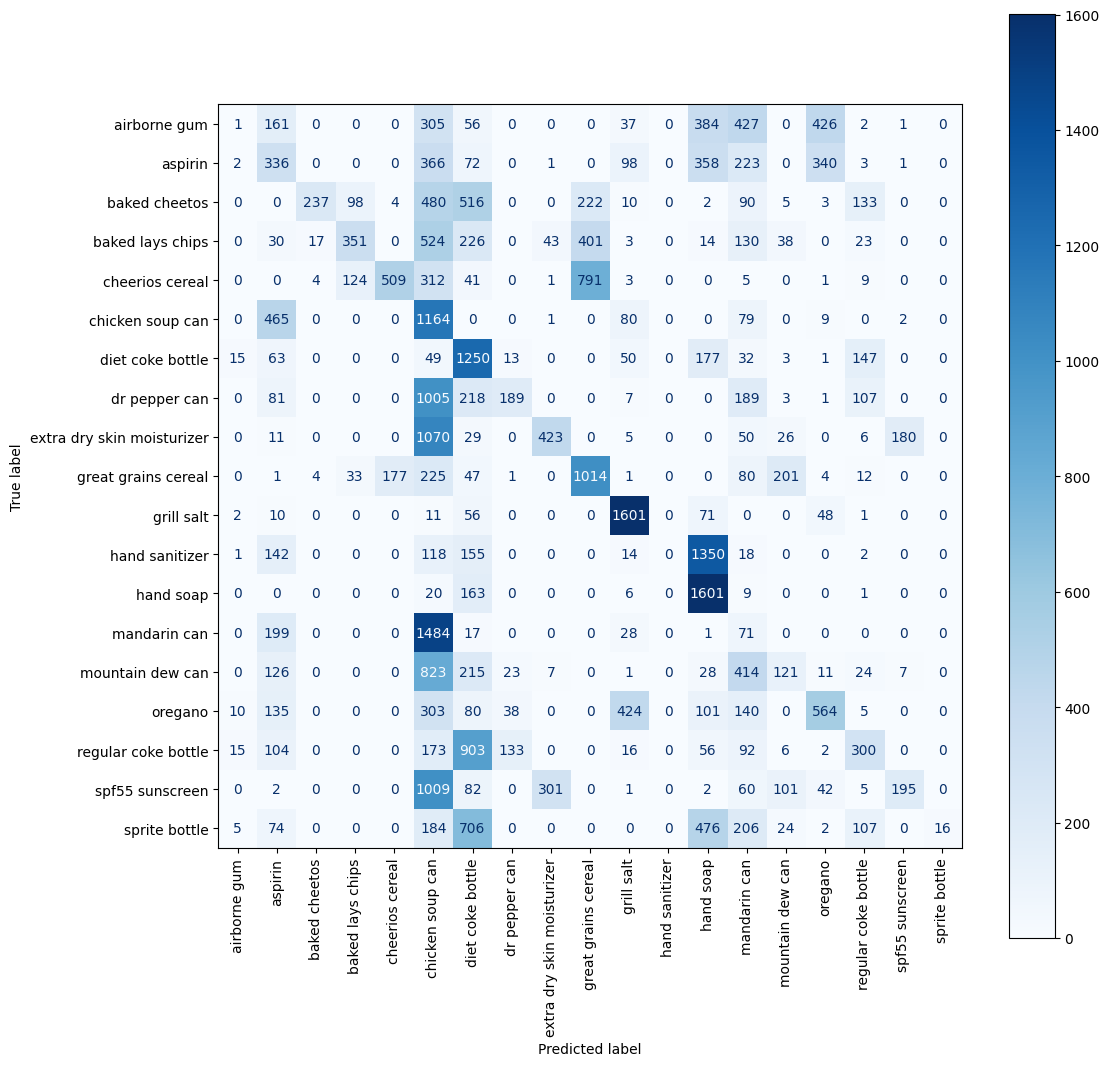

In [ ]:
cm = compute_confusion(df_a[(df_a["n_objects"] == 19) & (df_a["size"] == "l") & (df_a["k_examples"] == 5) & (df_a["blind"] == False) & (df_a["clutter"] == False)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls_mapping)

# make the plot larger
fig, ax = plt.subplots(figsize=(12, 12))

disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)

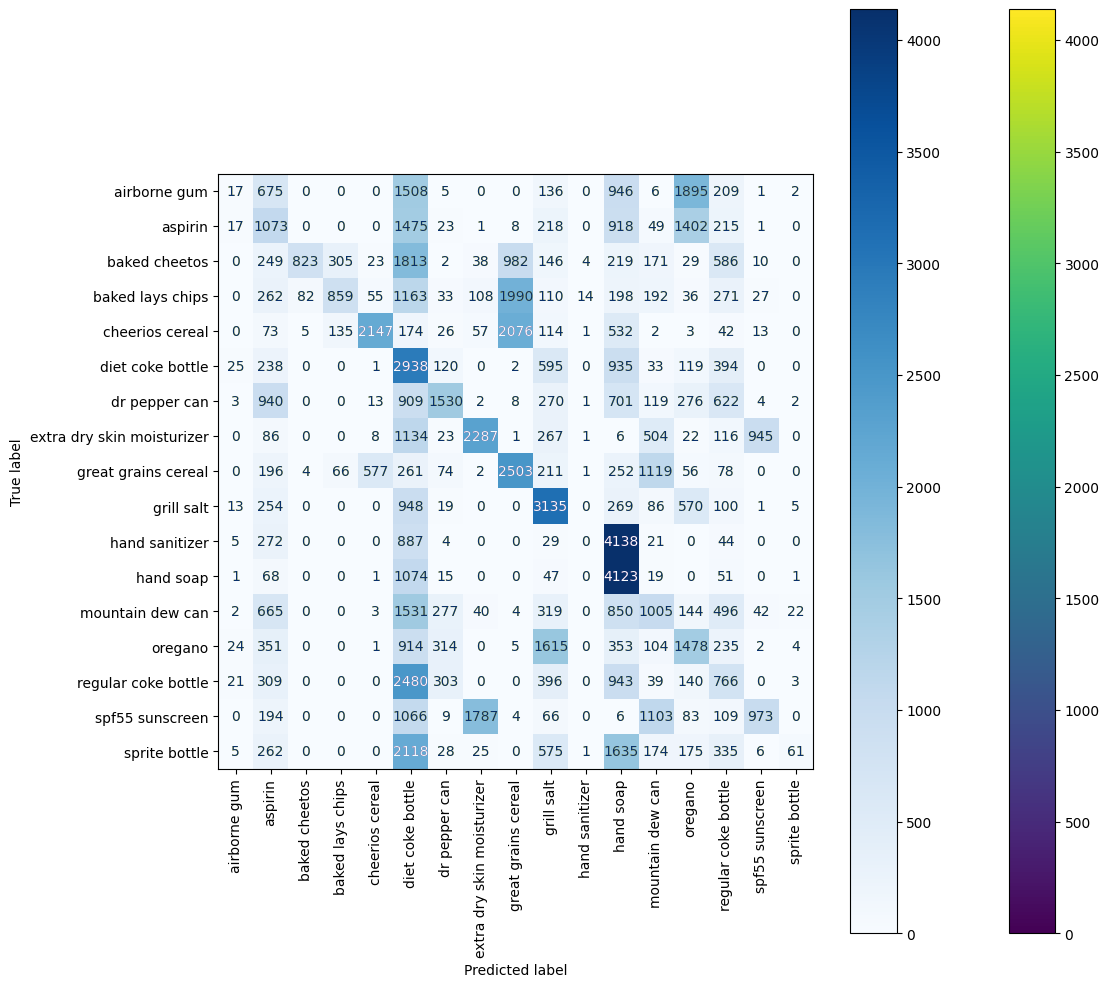

In [ ]:
cmdf = df_a[(df_a["n_objects"] == 19) & (df_a["size"] == "l") & (df_a["k_examples"] == 5)]

# make the plot larger
fig, ax = plt.subplots(figsize=(12, 12))

retained_labels = [i for i,c in enumerate(cls_mapping) if c not in ("chicken soup can", "mandarin can")]

disp = ConfusionMatrixDisplay.from_predictions(cmdf["target_class"],
        cmdf[[f"prob_cls_{i}" for i in retained_labels]].idxmax(axis=1).apply(lambda x: int(x.split("_")[-1])),
    display_labels=[cls_mapping[i] for i in retained_labels],
    labels=retained_labels,
    ax=ax,
    xticks_rotation='vertical',
    )

disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)


In [ ]:
df_a.groupby(["predicted_class"])["correct"].mean()

predicted_class
0     0.530341
1     0.292876
2     0.790864
3     0.731857
4     0.761198
5     0.165628
6     0.193580
7     0.395992
8     0.547059
9     0.426633
10    0.355685
11    0.679485
12    0.309194
13    0.179074
14    0.370814
15    0.308079
16    0.288724
17    0.644959
18    0.601268
Name: correct, dtype: float64

In [ ]:
df_a.groupby(["target_class"])["correct"].mean()

target_class
0     0.064957
1     0.141352
2     0.123386
3     0.294566
4     0.306040
5     0.579115
6     0.410863
7     0.231275
8     0.430556
9     0.494762
10    0.369008
11    0.184733
12    0.715530
13    0.555179
14    0.158697
15    0.127632
16    0.282852
17    0.215986
18    0.204443
Name: correct, dtype: float64

In [ ]:
# count number of prediction by predicted class
c = df_a[(df_a["n_objects"] == 19) & (df_a["size"] == "l") & (df_a["k_examples"] == 5)].groupby(["predicted_class"]).size()
# display by class name
c.index = [cls_mapping[i] for i in c.index]
c / c.sum()

airborne gum                  0.000789
aspirin                       0.046111
baked cheetos                 0.008158
baked lays chips              0.012641
cheerios cereal               0.024357
chicken soup can              0.259357
diet coke bottle              0.164444
dr pepper can                 0.008236
extra dry skin moisturizer    0.029094
great grains cereal           0.064191
grill salt                    0.080156
hand sanitizer                0.000205
hand soap                     0.152242
mandarin can                  0.063772
mountain dew can              0.012456
oregano                       0.036618
regular coke bottle           0.024220
spf55 sunscreen               0.012758
sprite bottle                 0.000195
dtype: float64

In [ ]:
# count number of prediction by predicted class
c = df_a.groupby(["predicted_class"]).size()
# display by class name
c.index = [cls_mapping[i] for i in c.index]
c

airborne gum                   14617
aspirin                        55252
baked cheetos                  18366
baked lays chips               46367
cheerios cereal                46461
chicken soup can              405313
diet coke bottle              257113
dr pepper can                  67807
extra dry skin moisturizer     88400
great grains cereal           135266
grill salt                    118768
hand sanitizer                 31075
hand soap                     266593
mandarin can                  362732
mountain dew can               49456
oregano                        48322
regular coke bottle           113915
spf55 sunscreen                38880
sprite bottle                  38497
dtype: int64

In [ ]:
df_a.columns

Index(['repeat', 'seed', 'hand', 'blind', 'illuminated', 'torch',
       'volume_portrait', 'clutter', 'target_class', 'predicted_class',
       'predicted_prob', 'correct', 'prob_cls_0', 'prob_cls_1', 'prob_cls_2',
       'prob_cls_3', 'prob_cls_4', 'prob_cls_5', 'prob_cls_6', 'prob_cls_7',
       'prob_cls_8', 'prob_cls_9', 'prob_cls_10', 'prob_cls_11', 'prob_cls_12',
       'prob_cls_13', 'prob_cls_14', 'prob_cls_15', 'prob_cls_16',
       'prob_cls_17', 'prob_cls_18', 'size', 'train blind', 'train clutter',
       'train hand', 'n_objects', 'k_examples', 'augment', 'WC',
       'target class name'],
      dtype='object')

In [ ]:
target_cls_probs = df_a.apply(lambda x: x["prob_cls_" + str(x["target_class"])], axis=1)

In [ ]:
df_a["target_class"].iloc[102600], df_a["prob_cls_9"].iloc[102600]

(18, 0.0039607272483408)

In [ ]:
target_cls_probs.iloc[102600]

0.6719111800193787

In [ ]:
prob_abs_diff = df_a[prob_cols].apply(lambda x: np.abs(x.to_numpy() - target_cls_probs.to_numpy()))

In [ ]:
prob_diff = df_a["predicted_prob"] - target_cls_probs

<Axes: >

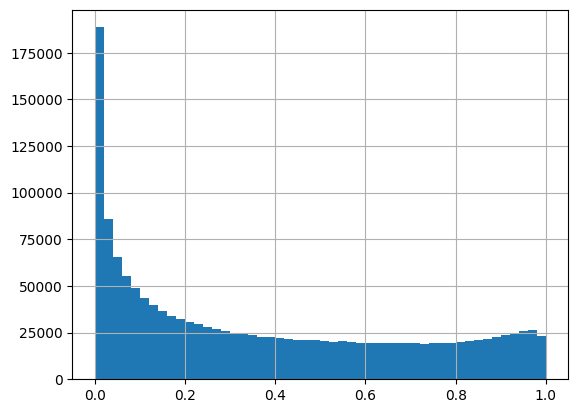

In [ ]:
fig, ax = plt.subplots()
prob_diff[df_a["correct"] == False].hist(bins=50, ax=ax)

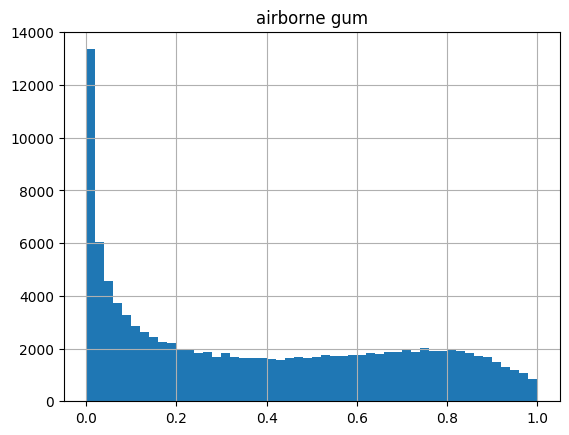

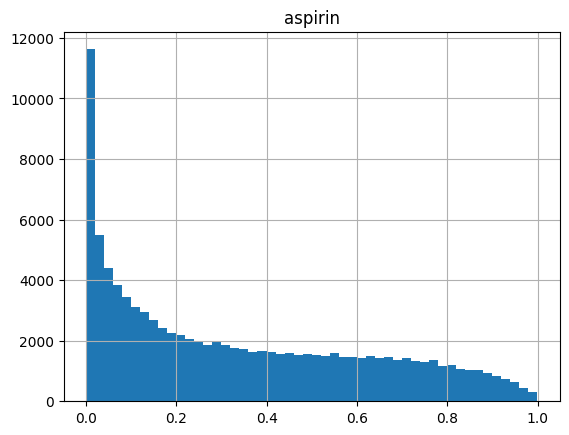

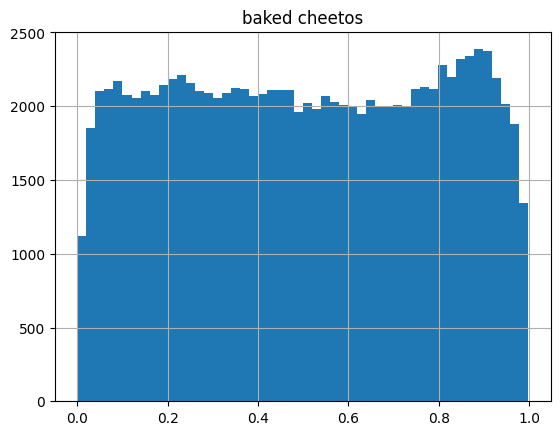

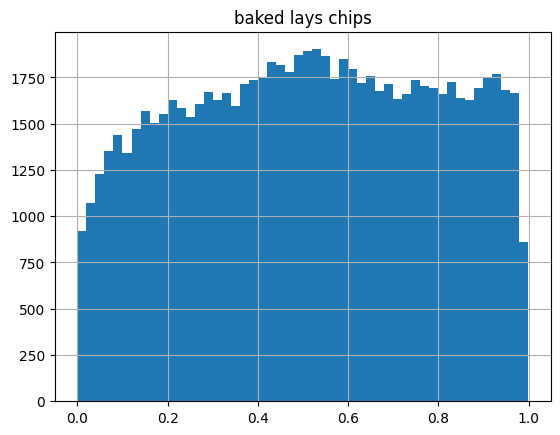

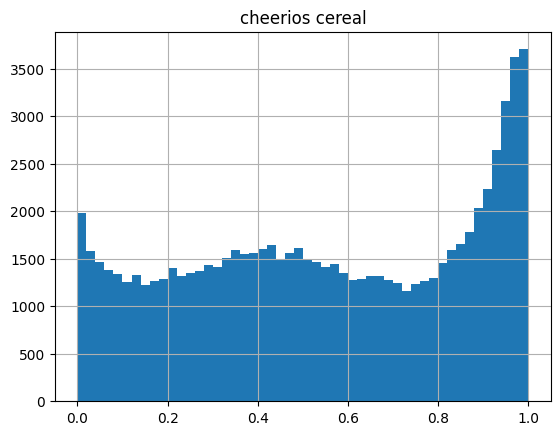

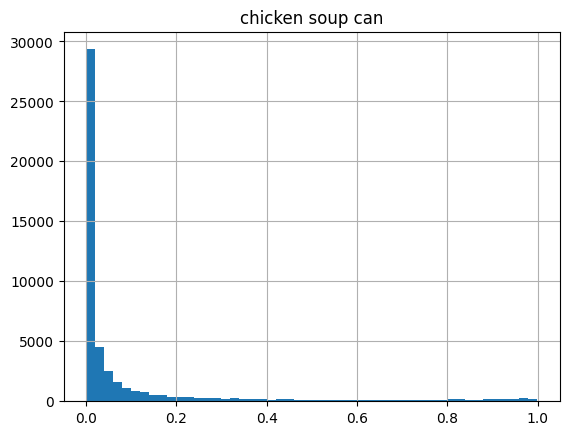

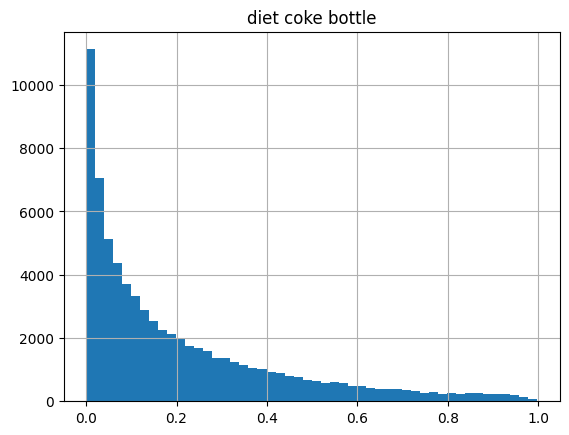

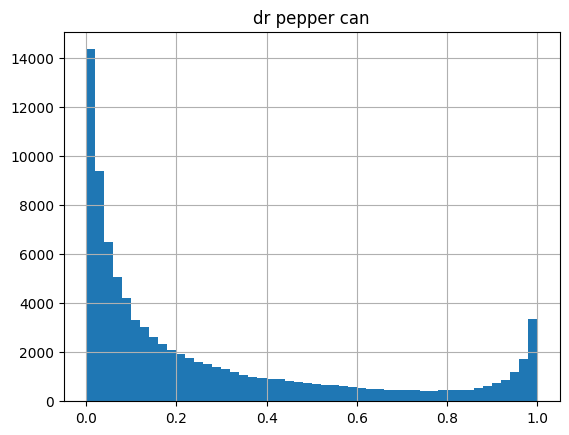

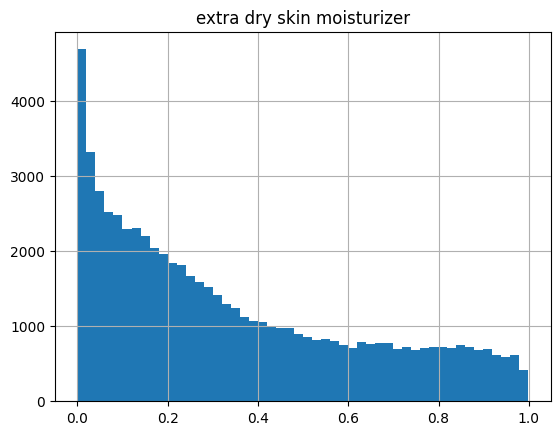

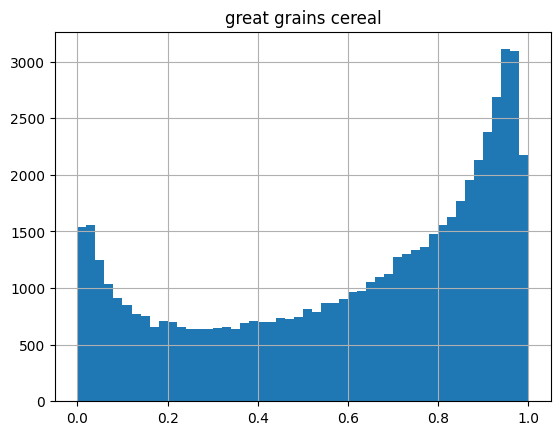

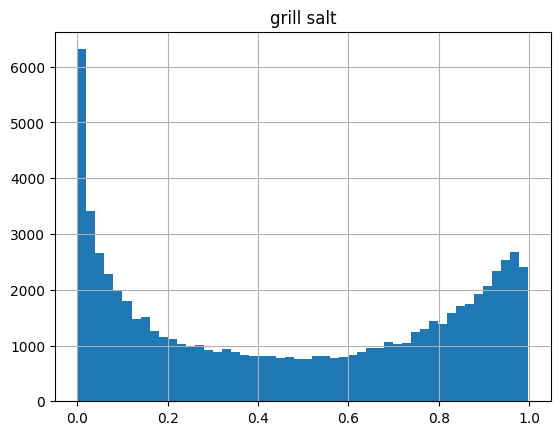

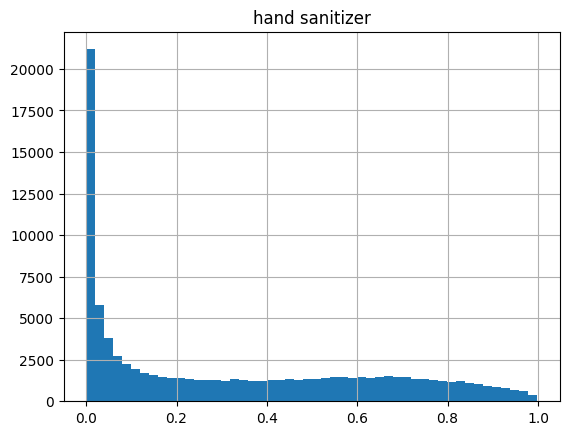

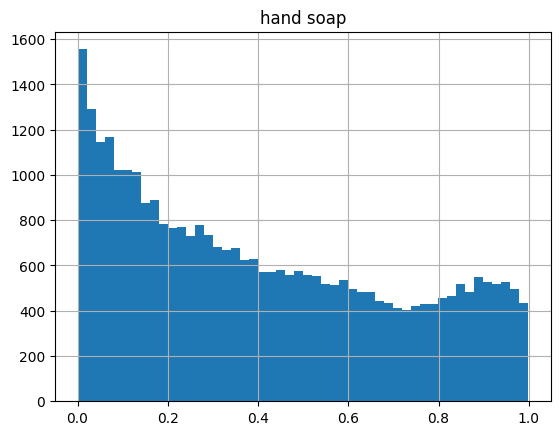

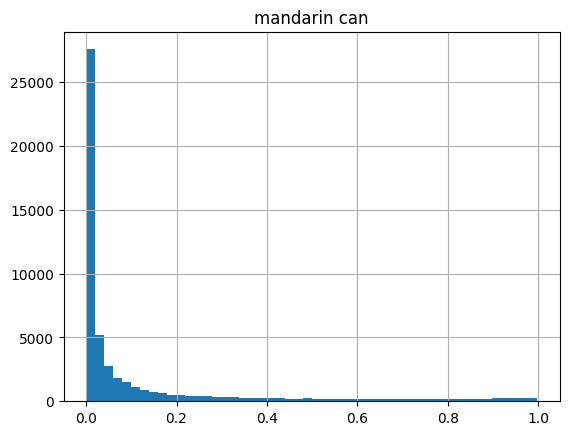

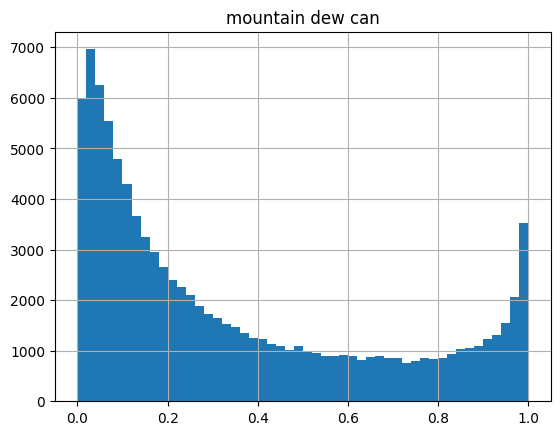

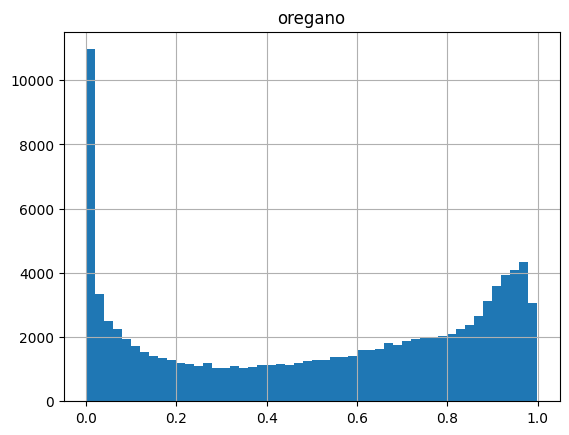

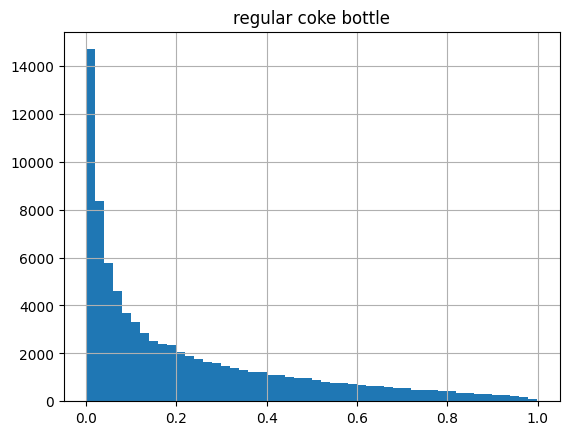

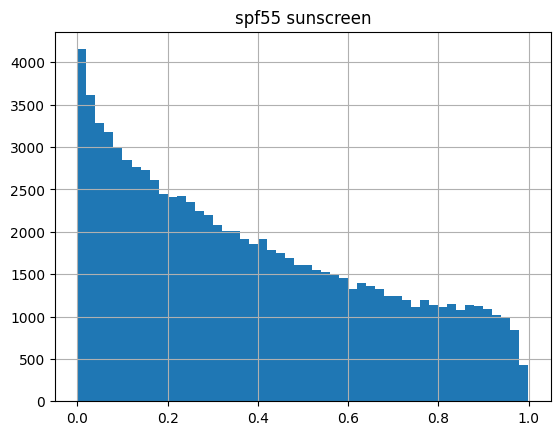

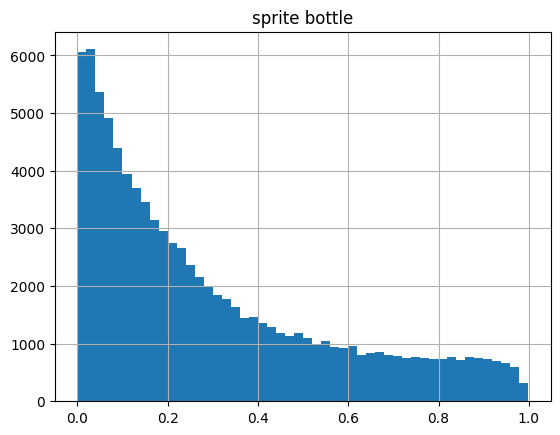

In [ ]:
# plot for each class
for i in range(19):
    fig, ax = plt.subplots()
    # [f"prob_cls_{i}"]
    prob_diff[(df_a["correct"] == False) & (df_a["target_class"] == i)].hist(bins=50, ax=ax)
    plt.title(cls_mapping[i])